### Custom BERT implementation

In [1]:
%cd ..
from inpainting.models import BERT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment

configure_environment()

/home/ventus/image-inpainting


Seed set to 22400


Device set to cuda


In [2]:
mnist = MNIST(frac=0.01, clusters=299)
weights = 1/mnist.distribution

In [3]:
model = BERT(
    vocab_size = mnist.tokens,      # BERT's vocabulary size
    embed_size = mnist.tokens,      # Hidden size
    num_layers = 12,                # Number of Transformer layers
    num_heads = 12,                 # Numbertargets of attention heads
    ff_hidden = 6400,               # Feed-forward hidden size
    max_len = 7*7,                  # Maximum sequence length
    dropout = 0.00,
	ce_weights=weights
)

In [4]:
Trainer(model, mnist).train(epochs=50, batch_size=64, lr=2e-5)

running on device cuda
Epoch: 0.00	RMSE: 161.12	Loss: 5.52e+00	Learning Rate: 1.96e-05
Epoch: 1.00	RMSE: 146.20	Loss: 4.80e+00	Learning Rate: 1.91e-05
Epoch: 2.00	RMSE: 105.94	Loss: 3.98e+00	Learning Rate: 1.87e-05
Epoch: 3.00	RMSE: 60.13	Loss: 3.00e+00	Learning Rate: 1.83e-05
Epoch: 4.00	RMSE: 38.76	Loss: 2.28e+00	Learning Rate: 1.79e-05
Epoch: 5.00	RMSE: 28.51	Loss: 1.80e+00	Learning Rate: 1.74e-05
Epoch: 6.00	RMSE: 28.21	Loss: 1.48e+00	Learning Rate: 1.70e-05
Epoch: 7.00	RMSE: 27.70	Loss: 1.25e+00	Learning Rate: 1.66e-05
Epoch: 8.00	RMSE: 26.87	Loss: 1.10e+00	Learning Rate: 1.62e-05
Epoch: 9.00	RMSE: 28.74	Loss: 9.64e-01	Learning Rate: 1.57e-05
Epoch: 10.00	RMSE: 29.25	Loss: 8.84e-01	Learning Rate: 1.53e-05
Epoch: 11.00	RMSE: 28.01	Loss: 9.27e-01	Learning Rate: 1.49e-05
Epoch: 12.00	RMSE: 26.97	Loss: 9.02e-01	Learning Rate: 1.44e-05
Epoch: 13.00	RMSE: 27.86	Loss: 8.96e-01	Learning Rate: 1.40e-05
Epoch: 14.00	RMSE: 25.97	Loss: 8.22e-01	Learning Rate: 1.36e-05
Epoch: 15.00	RMSE: 27.88

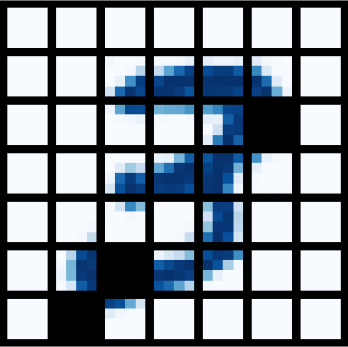

In [5]:
x = mnist[7]["input_ids"]
mnist.plot_sample(x)

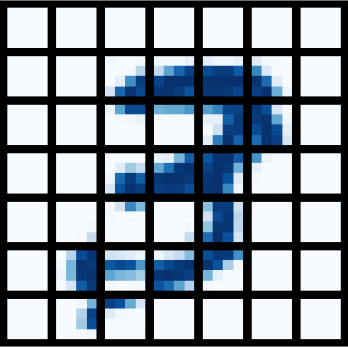

In [6]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)